In [2]:
import numpy as np
from numpy.fft import rfft, irfft
import matplotlib.pyplot as plt

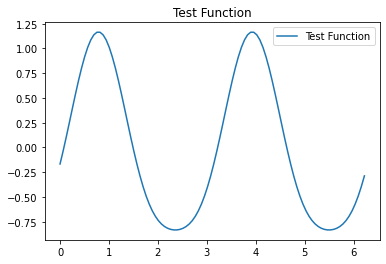

Fourier coefficients:
 [-0.   +0.j -0.   -0.j  0.   -1.j -0.   +0.j -0.167-0.j  0.   +0.j
 -0.   +0.j  0.   -0.j -0.   -0.j  0.   +0.j -0.   +0.j  0.   -0.j
 -0.   +0.j  0.   -0.j -0.   +0.j -0.   -0.j  0.   +0.j  0.   +0.j
  0.   +0.j -0.   -0.j  0.   +0.j -0.   +0.j -0.   +0.j  0.   +0.j
  0.   +0.j -0.   +0.j -0.   +0.j -0.   -0.j -0.   +0.j -0.   -0.j
  0.   +0.j -0.   -0.j -0.   -0.j -0.   -0.j -0.   +0.j -0.   -0.j
  0.   -0.j -0.   +0.j  0.   -0.j  0.   -0.j  0.   +0.j -0.   +0.j
 -0.   -0.j  0.   +0.j  0.   +0.j -0.   -0.j  0.   +0.j -0.   -0.j
 -0.   +0.j  0.   -0.j  0.   +0.j] 51


In [4]:
# Question 1
# TASK A: Define function to calculate the fourier coefficients

# Defining the function for fourier transform of the function.
def RealToFourier(a, N):
    c = (2/N)*rfft(a)
    return c

def func(x):
    y = np.sin(2*x) - (1/6)*np.cos(4*x)
    return y

# Defining the grid
N = 100
x_i = np.arange(0, 2*np.pi, 2*np.pi/N)

test_func = func(x_i)
plt.plot(x_i, test_func, label = 'Test Function')
plt.title('Test Function')
plt.legend()
plt.show()

test_fourier_coe = RealToFourier(test_func, N)
print('Fourier coefficients:\n', np.around(test_fourier_coe, 3), len(test_fourier_coe))


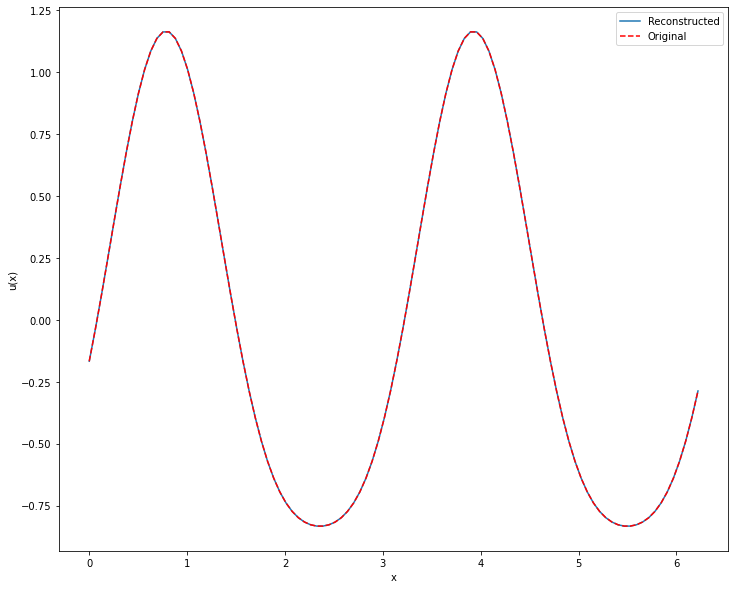

In [35]:
# TASK B: Inverse fourier transform
def FourierToReal(c, N):
    a = (N/2)*irfft(c)
    return a

test_func_inv = FourierToReal(test_fourier_coe, N)
plt.figure(figsize = (12, 10))
plt.plot(x_i, test_func_inv, label = 'Reconstructed')
plt.plot(x_i, test_func, label = 'Original', ls = '--', c= 'red')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.show()


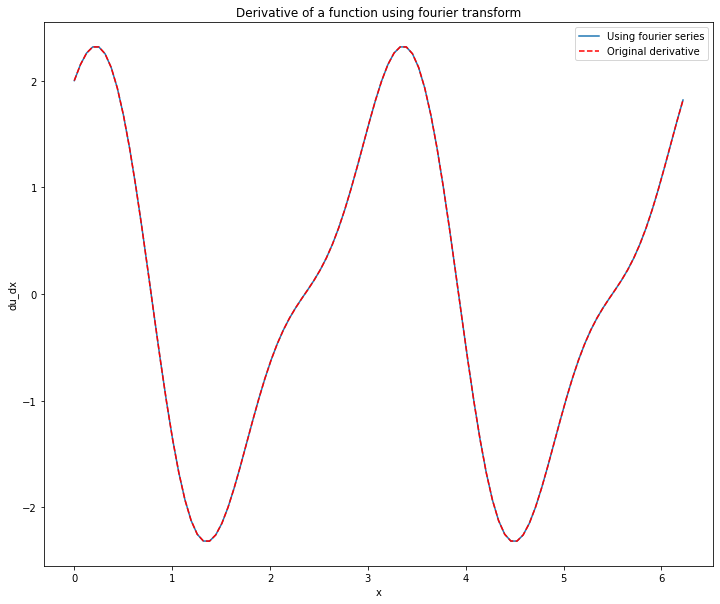

In [34]:
# TASK C: Define derivative function
plt.rcParams['text.usetex'] = False
def du_dx_Fourier(u, N):
    c = RealToFourier(u, N)
    c_dash = np.array([complex(0, k)*c[k] for k in range(int(N/2+1))])
    du_dx = FourierToReal(c_dash, N)
    return du_dx

# Test
du_dx_test = du_dx_Fourier(test_func, N)
original_derivative = 2*np.cos(2*x_i) + (4/6)*np.sin(4*x_i)

# Plotting

plt.figure(figsize = (12, 10))
plt.plot(x_i, du_dx_test, label = 'Using fourier series')
plt.plot(x_i, original_derivative, label = 'Original derivative', c= 'red', ls = '--')
plt.title('Derivative of a function using fourier transform')
plt.xlabel('x')
plt.ylabel('du_dx')
plt.legend()
plt.show()
    

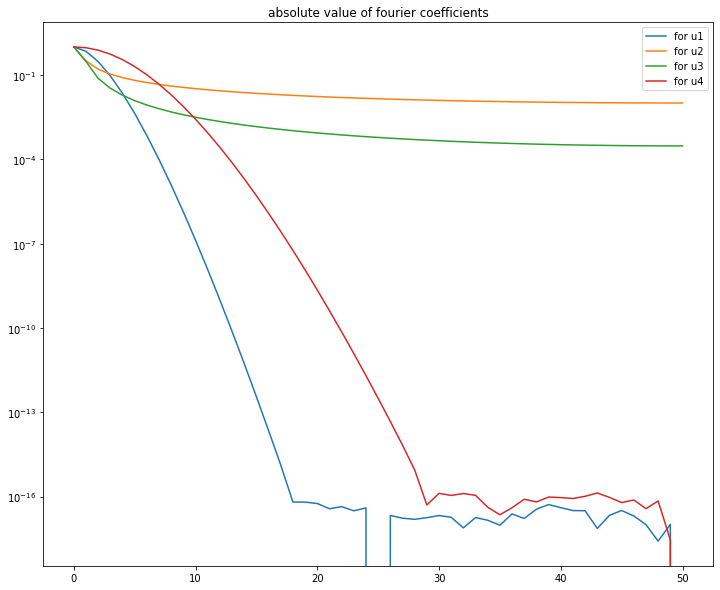

In [41]:
# Question 2
u1 = np.exp(-2*(np.cos(x_i)+1))
u2 = x_i/6
u3 = x_i*(x_i - 2*np.pi)/10
u4 = np.exp(-8*(np.cos(x_i)+1))

c1 = RealToFourier(u1, N)
c2 = RealToFourier(u2, N)
c3 = RealToFourier(u3, N)
c4 = RealToFourier(u4, N)

# Plotting abs(ck) vs k for each of the above function
plt.figure(figsize = (12, 10))
plt.plot(abs(c1)/np.max(abs(c1)), label = 'for u1')
plt.plot(abs(c2)/np.max(abs(c2)), label = 'for u2')
plt.plot(abs(c3)/np.max(abs(c3)), label = 'for u3')
plt.plot(abs(c4)/np.max(abs(c4)), label = 'for u4')
plt.yscale('log')
plt.title('absolute value of fourier coefficients')
plt.legend()
plt.show()